In [1]:
from datetime import datetime, timedelta
import h5py
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [65]:
region = 'TASMAN' # NEP SWP TASMAN
path2save = '/Users/jacoposala/Downloads/'
file_path_ecco = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/ECCO_daily_avg_box_{region}_1992_2017/ECCOv4r4_heat_daily_box_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'
file_path_oisst = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/OISST_daily_avg_box_{region}_1992_2017/ECCOv4r4_heat_daily_box_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'



In [69]:
start_index_plot = 0 # 0
end_index_plot = 700 # 700

In [66]:
# # Load ECCO output from Matlab MHWs code
file_path_ecco = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/ECCO_daily_avg_box_{region}_1992_2017/ECCOv4r4_heat_daily_box_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'
# Load the data selected above
mat_data_ecco = h5py.File(file_path_ecco, 'r')

# List the keys in the file
# print("Keys in the file:", list(mat_data.keys()))

# Access the data under the key '#refs#'
refs_data_ecco = mat_data_ecco['#refs#']

# Access the data under the key 'find_MHWs_info'
find_mhws_info_data_ecco = mat_data_ecco['find_MHWs_info']

# find_mhws_info_data_ecco.keys()


In [67]:
# # Load oisst output from Matlab MHWs code
file_path_oisst = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/oisst_daily_avg_box_{region}_1992_2017/oisst_v2_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'
# Load the data selected above
mat_data_oisst = h5py.File(file_path_oisst, 'r')

# List the keys in the file
# print("Keys in the file:", list(mat_data.keys()))

# Access the data under the key '#refs#'
refs_data_oisst = mat_data_oisst['#refs#']

# Access the data under the key 'find_MHWs_info'
find_mhws_info_data_oisst = mat_data_oisst['find_MHWs_info']

# find_mhws_info_data_oisst.keys()


<KeysViewHDF5 ['data_backup', 'data_datenum', 'data_mhw_tstep_msk', 'data_percentile3d', 'data_percentile3d_not_smooth', 'data_seasonal', 'data_used4MHWs', 'data_used4MHWs_declineAve', 'data_used4MHWs_eventAve', 'data_used4MHWs_onsetAve', 'delta_tstep', 'end_tstep', 'end_tstep_stored_at_peak', 'events_duration_in_tsteps', 'events_number', 'flag_remove_trend', 'onset_duration_in_tsteps', 'peak_tstep', 'peak_tstep_msk', 'peak_value', 'percentile', 'start_tstep', 'start_tstep_msk', 'tstep_part_of_event_msk', 'years']>

In [68]:
data_percentile3d_ecco = find_mhws_info_data_ecco['data_percentile3d'].value
data_percentile3d_oisst = find_mhws_info_data_oisst['data_percentile3d'].value
data_used4MHWs_ecco = find_mhws_info_data_ecco['data_used4MHWs'].value
data_used4MHWs_oisst = find_mhws_info_data_oisst['data_used4MHWs'].value


matlab_datenum = find_mhws_info_data_ecco['data_datenum'].value[0]
python_datetime = [datetime.fromordinal(int(x)) + timedelta(days=x%1) - timedelta(days = 366) for x in matlab_datenum]



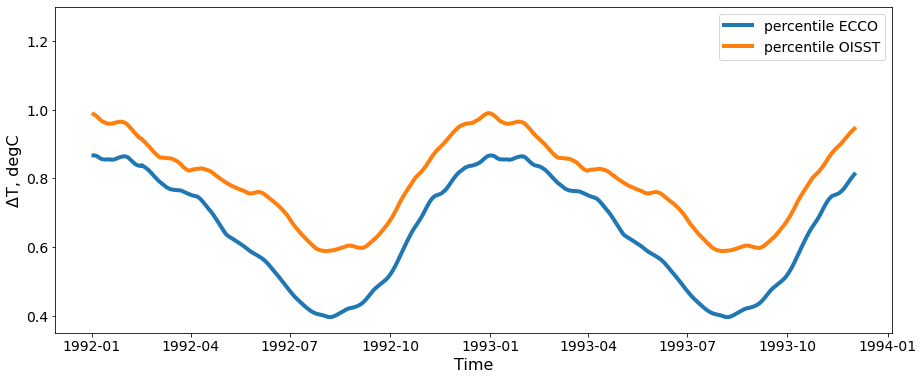

In [70]:
plt.figure(figsize=(15,6))
plt.plot(python_datetime[start_index_plot:end_index_plot],  \
         data_percentile3d_ecco[1:-1][start_index_plot:end_index_plot,0,0], linewidth=4, label = 'percentile ECCO')
plt.plot(python_datetime[start_index_plot:end_index_plot],  \
         data_percentile3d_oisst[1:-1][start_index_plot:end_index_plot,0,0], linewidth=4, label = 'percentile OISST')
# plt.plot(python_datetime[start_index_plot:end_index_plot],  \
#          data_used4MHWs_ecco[1:-1][start_index_plot:end_index_plot,0,0], linewidth=2, label = 'data ECCO')
# plt.plot(python_datetime[start_index_plot:end_index_plot],  \
#          data_used4MHWs_oisst[1:-1][start_index_plot:end_index_plot,0,0], linewidth=2, label = 'data OISST')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Time', fontsize=16)
plt.ylabel('ΔT, degC', fontsize=16)
plt.ylim(0.35,1.3)
plt.savefig(path2save + f'percentile_comparison_ECCO_OISST_{region}.png', dpi=1000)
